# Config and Import

In [124]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import numpy as np
import pandas as pd

# loading ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# python core library for machine learning and data science
import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans

# Read files

In [125]:
ruta = '../data/'

df_sales = pd.read_csv(ruta+'daily_sales_cleandata.csv')

In [126]:
df_sales.head()

,id,item,category,department,store,store_code,region,d,qty_sold,date,weekday_int,holiday,weekend,yearweek,sell_price
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,5,0,1,201104,12.7414
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,5,0,1,201104,5.2801
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,5,0,1,201104,3.9501
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,5,0,1,201104,5.7722
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,5,0,1,201104,3.9634


In [127]:
df_sales['sell_price'].isnull().sum()

0

In [128]:
df_sales[df_sales['sell_price'].isnull()]

,id,item,category,department,store,store_code,region,d,qty_sold,date,weekday_int,holiday,weekend,yearweek,sell_price


In [129]:
df_sales[df_sales['sell_price'].isnull()]['yearweek'].value_counts()

Series([], Name: count, dtype: int64)

In [130]:
df_sales['revenue']=df_sales['qty_sold']*df_sales['sell_price']

# Clustering

## >> Clustering por productos

In [131]:
df_product_features = df_sales.groupby('item').agg(
                        total_sales = ('qty_sold', 'sum'),
                        min_sales = ('qty_sold', 'min'),
                        mean_sales = ('qty_sold', 'mean'),
                        max_sales = ('qty_sold', 'max'),
                        min_price = ('sell_price', 'min'),
                        max_price = ('sell_price', 'max'),    
                        total_revenue = ('revenue', 'sum'),
                        mean_revenue = ('revenue', 'mean'),
                        max_revenue = ('revenue', 'max'),
                        min_revenue = ('revenue','min')
                                                
                    )
df_product_features.sample(15)

#al hacer el groupby ya tenemos el item como index

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue
item,,,,,,,,,,
HOME_&_GARDEN_1_476,2934,0,0.153372,9,6.0500,6.0500,1.775070e+04,0.927899,54.4500,0.0
ACCESORIES_1_239,5653,0,0.295504,10,3.9501,3.9501,2.232992e+04,1.167272,39.5010,0.0
HOME_&_GARDEN_2_074,21324,0,1.114689,28,1.2000,1.2125,2.584805e+04,1.351179,33.9500,0.0
ACCESORIES_2_115,9206,0,0.481234,18,0.6650,4.2161,3.047349e+04,1.592969,59.1318,0.0
HOME_&_GARDEN_1_353,9062,0,0.473706,13,2.5000,4.3000,3.895430e+04,2.036294,55.9000,0.0
SUPERMARKET_3_548,3326,0,0.173863,6,1.8960,3.0960,1.022244e+04,0.534367,18.5760,0.0
SUPERMARKET_2_371,82147,0,4.294145,48,1.8840,2.8560,1.907650e+05,9.972036,96.7680,0.0
SUPERMARKET_3_573,28434,0,1.486357,64,1.0560,1.2000,3.412066e+04,1.783620,76.8000,0.0
SUPERMARKET_1_110,75548,0,3.949190,62,1.8000,2.3520,1.662969e+05,8.692988,145.8240,0.0


In [132]:
pipe = Pipeline(steps = [
    #("Imputer", KNNImputer()), --> No tenemos nulos
    #("CustomTransformer", ClientIdFeatureGenerator), # Aqui añadimos el Transformer que hemos generado
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))) #es un Scaler para quitar los outliers superiores en este caso
])

In [133]:
df_product_transformed = pipe.fit_transform(df_product_features)

In [134]:
df_product_transformed

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue
item,,,,,,,,,,
ACCESORIES_1_001,-0.028417,0.0,-0.028417,-0.035804,0.246068,0.340870,0.003018,0.003018,0.000499,0.0
ACCESORIES_1_002,-0.023364,0.0,-0.023364,-0.013426,0.015054,0.035379,-0.030747,-0.030747,-0.015080,0.0
ACCESORIES_1_003,-0.042319,0.0,-0.042319,-0.035804,-0.066572,0.144288,-0.069559,-0.069559,-0.083449,0.0
ACCESORIES_1_004,0.155075,0.0,0.155075,0.049230,0.151352,0.071864,0.353998,0.353998,0.156387,0.0
ACCESORIES_1_005,0.026649,0.0,0.026649,0.004475,-0.023449,-0.013085,0.022629,0.022629,-0.032192,0.0
...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_823,0.030660,0.0,0.030660,0.049230,-0.070173,-0.034392,0.013823,0.013823,0.017373,0.0
SUPERMARKET_3_824,-0.006282,0.0,-0.006282,0.017902,0.000000,-0.049132,-0.033132,-0.033132,-0.015464,0.0
SUPERMARKET_3_825,0.020921,0.0,0.020921,0.026853,-0.000695,0.034392,0.041319,0.041319,0.060327,0.0


In [135]:
sse = {}

for k in range(2, 15):

    print(f"Fitting pipe with {k} clusters")

    clustering_model = KMeans(n_clusters = k)
    clustering_model.fit(df_product_transformed)

    sse[k] = clustering_model.inertia_ #la metrica inertia es la dispersion

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters
Fitting pipe with 10 clusters
Fitting pipe with 11 clusters
Fitting pipe with 12 clusters
Fitting pipe with 13 clusters
Fitting pipe with 14 clusters


## Elbow curve

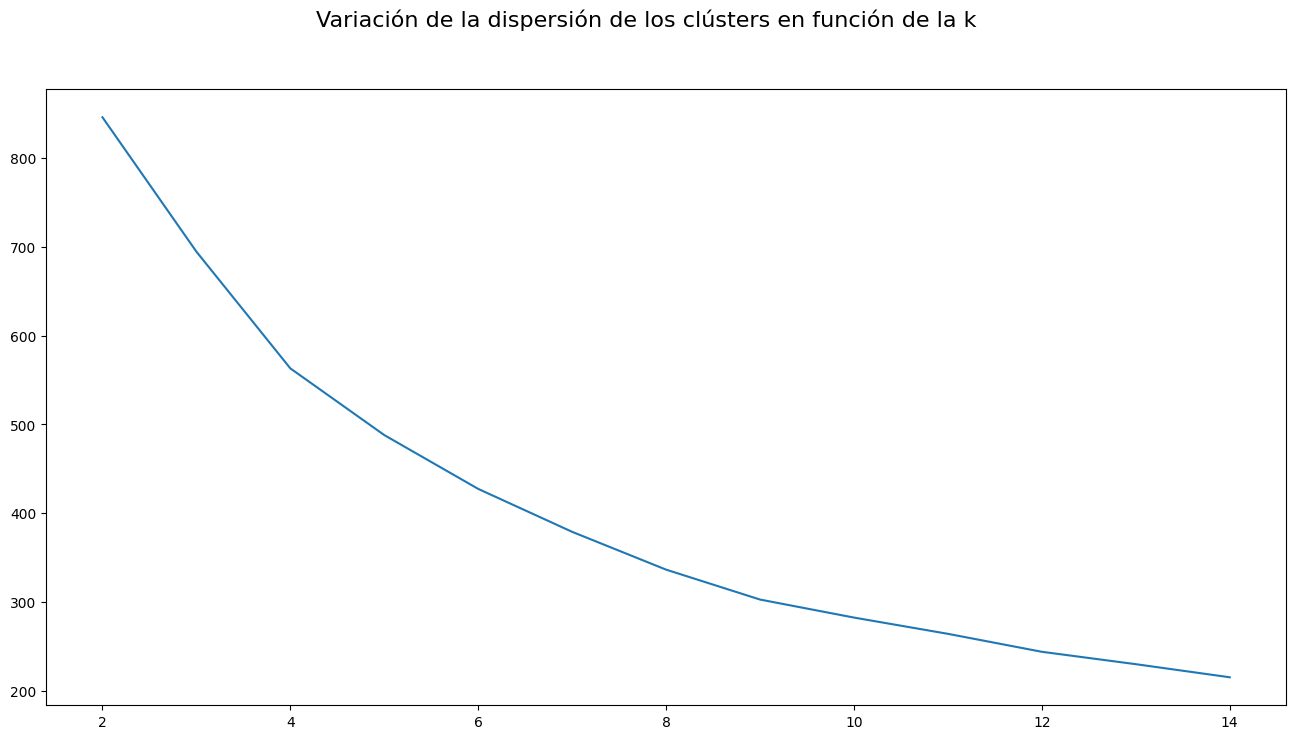

In [136]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

Vemos que hay dos puntos donde hay diferencia en la pendiente, uno con 4 clusters y otro mas pronunciado con 8. Este es el que cogemos

## Segmentación de los clientes con la "k adecuada"

In [137]:
# Añadimos el clustering a la pipeline 

pipe = Pipeline(steps = [
    
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 8, random_state = 175))
])

In [138]:
# Nos sirve para ver todos los pasos de la pipeline a la vez que fiteamos:
pipe.fit(df_product_features)

Pipeline(steps=[('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(random_state=175))])

In [139]:
#X_processed = pipe[:2].transform(df_features)
X_processed = df_product_features.copy() 
#para poder analizar las variables sin escalado nos saltamos los ultimos pasos y procesamos los datos iniciales justo antes del escalado

In [140]:
labels = pipe.predict(df_product_features)
X_processed["cluster"] = labels

In [141]:
X_processed.shape

(3049, 11)

In [142]:
X_processed.head()

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue,cluster
item,,,,,,,,,,,
ACCESORIES_1_001,4093,0,0.213957,6,6.6500,12.7414,45020.6596,2.353406,65.9148,0.0,3
ACCESORIES_1_002,5059,0,0.264454,11,2.6600,5.2801,26705.4557,1.395999,58.0811,0.0,1
ACCESORIES_1_003,1435,0,0.075013,6,1.2502,7.9401,5652.2340,0.295464,23.7006,0.0,1
ACCESORIES_1_004,39175,0,2.047831,25,5.0141,6.1712,235405.2253,12.305553,144.3050,0.0,0
ACCESORIES_1_005,14621,0,0.764297,15,1.9950,4.0964,55658.1991,2.909472,49.4760,0.0,1


### Ficha de los productos

In [143]:
ficha_df = pd.DataFrame()

In [144]:
df_product_features.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['total_sales', 'min_sales', 'mean_sales', 'max_sales', 'min_price',
       'max_price', 'total_revenue', 'mean_revenue', 'max_revenue',
       'min_revenue'],
      dtype='object')>

In [145]:
resumen_data = X_processed[["cluster", 'total_sales']].groupby("cluster").describe().T[1:]
resumen_data

cluster                       0             1             2             3  \
total_sales mean   51028.349398  10626.907151  5.267158e+05   6955.327132   
            std    26296.869211   8008.972922  2.620861e+05   5465.313364   
            min     8509.000000    568.000000  2.831040e+05    746.000000   
            25%    31798.500000   4218.750000  3.900010e+05   2934.000000   
            50%    43110.000000   8371.000000  3.961720e+05   5268.000000   
            75%    63690.000000  15208.250000  5.652990e+05   9622.000000   
            max   140886.000000  46194.000000  1.002529e+06  30415.000000   

cluster                       4              5              6             7  
total_sales mean  181075.949153   62960.917647   43421.000000   5929.937500  
            std    59040.770063   36955.261473   41586.533647   4511.118036  
            min    77106.000000    7368.000000   12286.000000    855.000000  
            25%   140229.000000   33843.000000   19724.500000   2672.250000  
            50%   171275.000000   56993.000000   27089.500000   4420.500000  
            75%   210967.000000   80783.000000   46778.500000   7998.750000  
            max   363082.000000  162173.000000  123450.000000  20921.000000

In [146]:
for i, col in enumerate(['total_sales', 'min_sales', 'mean_sales', 'max_sales', 'min_price',
       'max_price', 'total_revenue', 'mean_revenue']):
    resumen_data = X_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df = pd.concat([ficha_df, resumen_data])

In [147]:
ficha_df.style.background_gradient(cmap = 'Blues', axis = 1)

## >> Clustering por tienda

In [148]:
df_sales.head()

,id,item,category,department,store,store_code,region,d,qty_sold,date,weekday_int,holiday,weekend,yearweek,sell_price,revenue
0,ACCESORIES_1_001_NYC_1,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,5,0,1,201104,12.7414,0.0
1,ACCESORIES_1_002_NYC_1,ACCESORIES_1_002,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,5,0,1,201104,5.2801,0.0
2,ACCESORIES_1_003_NYC_1,ACCESORIES_1_003,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,5,0,1,201104,3.9501,0.0
3,ACCESORIES_1_004_NYC_1,ACCESORIES_1_004,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,5,0,1,201104,5.7722,0.0
4,ACCESORIES_1_005_NYC_1,ACCESORIES_1_005,ACCESORIES,ACCESORIES_1,Greenwich_Village,NYC_1,New York,d_1,0,2011-01-29,5,0,1,201104,3.9634,0.0


In [149]:
df_store_features = df_sales.groupby('store').agg(
                        total_sales = ('qty_sold', 'sum'),
                        min_sales = ('qty_sold', 'min'),
                        mean_sales = ('qty_sold', 'mean'),
                        max_sales = ('qty_sold', 'max'),
                        min_price = ('sell_price', 'min'),
                        max_price = ('sell_price', 'max'),    
                        total_revenue = ('revenue', 'sum'),
                        mean_revenue = ('revenue', 'mean'),
                        max_revenue = ('revenue', 'max'),
                        min_revenue = ('revenue','min')
                        
                    )
df_store_features

#al hacer el groupby ya tenemos el item como index

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue
store,,,,,,,,,,
Back_Bay,6089330,0,1.043992,385,0.0240,41.2034,2.194624e+07,3.762597,2152.4454,0.0
Brooklyn,4103676,0,0.703559,300,0.0120,41.2034,1.504681e+07,2.579716,465.0000,0.0
Greenwich_Village,7698216,0,1.319829,648,0.0125,41.2034,2.773509e+07,4.755073,2597.1840,0.0
Harlem,5685475,0,0.974753,227,0.2400,41.2034,2.150717e+07,3.687321,607.3920,0.0
Midtown_Village,5149062,0,0.882787,224,0.0120,44.8500,1.823533e+07,3.126377,654.4080,0.0
Queen_Village,6427782,0,1.102018,374,0.0125,134.1500,2.075230e+07,3.557901,854.2856,0.0
Roxbury,7214384,0,1.236878,626,0.0600,38.5168,2.526658e+07,4.331857,903.1680,0.0
South_End,5595292,0,0.959291,634,0.0600,65.7750,1.934092e+07,3.315926,2208.6750,0.0
Tribeca,11188180,0,1.918170,763,0.0133,41.2034,3.949288e+07,6.770900,1649.3760,0.0


In [150]:
pipe = Pipeline(steps = [
    #("Imputer", KNNImputer()), --> No tenemos nulos
    #("CustomTransformer", ClientIdFeatureGenerator), # Aqui añadimos el Transformer que hemos generado
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))) #es un Scaler para quitar los outliers superiores en este caso
])

In [151]:
df_store_transformed = pipe.fit_transform(df_store_features)

In [152]:
df_store_transformed

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue
store,,,,,,,,,,
Back_Bay,-0.024995,0.0,-0.024995,0.010404,0.025260,0.000000,0.015546,0.015546,0.607337,0.0
Brooklyn,-0.318279,0.0,-0.318279,-0.150383,-0.031398,0.000000,-0.279454,-0.279454,-0.197274,0.0
Greenwich_Village,0.212640,0.0,0.212640,0.507897,-0.029037,0.000000,0.263061,0.263061,0.819398,0.0
Harlem,-0.084645,0.0,-0.084645,-0.288471,1.045090,0.000000,-0.003227,-0.003227,-0.129378,0.0
Midtown_Village,-0.163874,0.0,-0.163874,-0.294145,-0.031398,0.040306,-0.143122,-0.143122,-0.106960,0.0
Queen_Village,0.024995,0.0,0.024995,-0.010404,-0.029037,1.027330,-0.035503,-0.035503,-0.011654,0.0
Roxbury,0.141177,0.0,0.141177,0.466282,0.195231,-0.029695,0.157515,0.157515,0.011654,0.0
South_End,-0.097965,0.0,-0.097965,0.481415,0.195231,0.271588,-0.095850,-0.095850,0.634149,0.0
Tribeca,0.728113,0.0,0.728113,0.725433,-0.025260,0.000000,0.765791,0.765791,0.367463,0.0


In [153]:
sse_store = {}

for k in range(2, 10):                  # Ver si este rango esta bien o modificar.

    print(f"Fitting pipe with {k} clusters")

    clustering_store_model = KMeans(n_clusters = k)
    clustering_store_model.fit(df_store_transformed)

    sse_store[k] = clustering_store_model.inertia_ #la metrica inertia es la dispersion

Fitting pipe with 2 clusters
Fitting pipe with 3 clusters
Fitting pipe with 4 clusters
Fitting pipe with 5 clusters
Fitting pipe with 6 clusters
Fitting pipe with 7 clusters
Fitting pipe with 8 clusters
Fitting pipe with 9 clusters


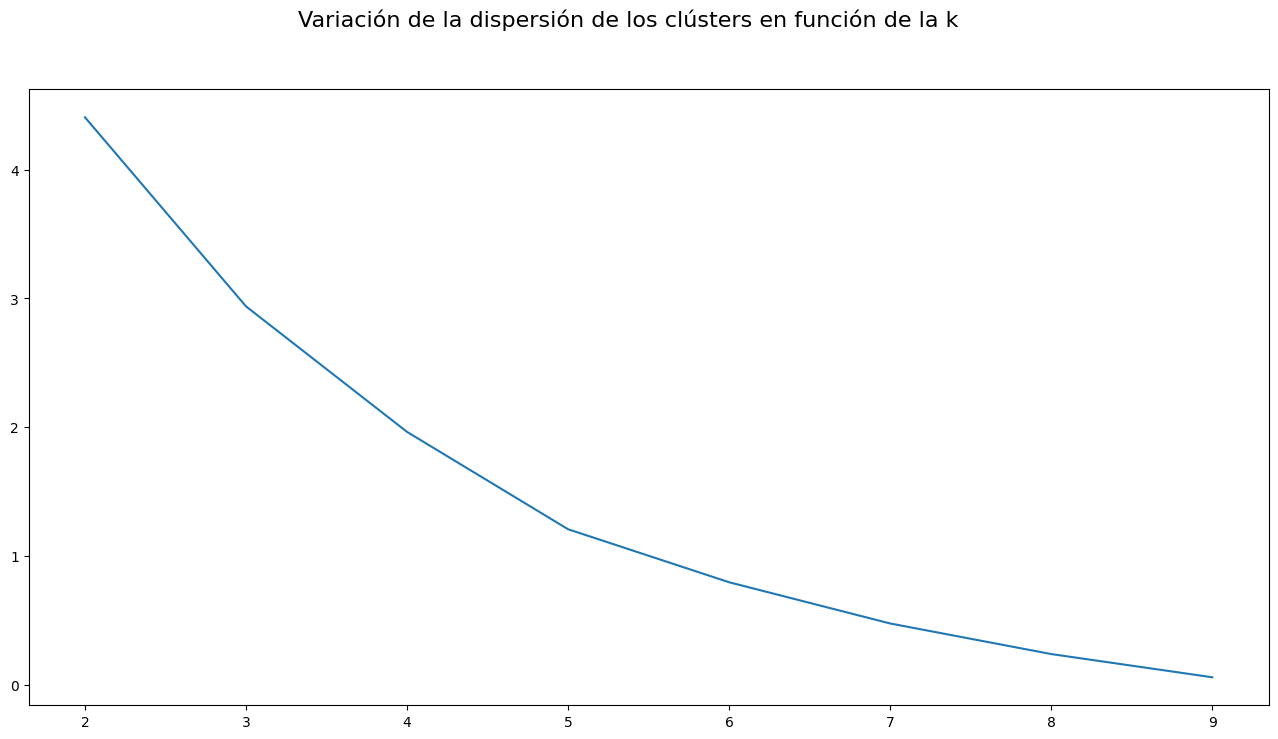

In [154]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_store_values = list(sse_store.keys())
y_store_values = list(sse_store.values())

ax.plot(x_store_values, y_store_values, label = "Inertia/dispersión de los clústers")
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

### Segmentacion de los clientes por stores.

In [155]:
pipe_store = Pipeline(steps = [
    
    ("RobustScaler", RobustScaler(quantile_range = (0, 99.0))),
    ("Clustering", KMeans(n_clusters = 5, random_state = 175))
])

In [156]:
# Nos sirve para ver todos los pasos de la pipeline a la vez que fiteamos:
pipe_store.fit(df_store_features)

Pipeline(steps=[('RobustScaler', RobustScaler(quantile_range=(0, 99.0))),
                ('Clustering', KMeans(n_clusters=5, random_state=175))])

In [157]:
#X_processed = pipe[:2].transform(df_features)
X_store_processed = df_store_features.copy() 

In [158]:
labels_store = pipe_store.predict(df_store_features)
X_store_processed["cluster"] = labels_store

In [159]:
X_store_processed.shape

(10, 11)

In [160]:
X_store_processed.head()

,total_sales,min_sales,mean_sales,max_sales,min_price,max_price,total_revenue,mean_revenue,max_revenue,min_revenue,cluster
store,,,,,,,,,,,
Back_Bay,6089330,0,1.043992,385,0.0240,41.2034,2.194624e+07,3.762597,2152.4454,0.0,0
Brooklyn,4103676,0,0.703559,300,0.0120,41.2034,1.504681e+07,2.579716,465.0000,0.0,2
Greenwich_Village,7698216,0,1.319829,648,0.0125,41.2034,2.773509e+07,4.755073,2597.1840,0.0,0
Harlem,5685475,0,0.974753,227,0.2400,41.2034,2.150717e+07,3.687321,607.3920,0.0,3
Midtown_Village,5149062,0,0.882787,224,0.0120,44.8500,1.823533e+07,3.126377,654.4080,0.0,2


### Ficha de las tiendas

In [161]:
ficha_df_store = pd.DataFrame()

In [162]:
df_store_features.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['total_sales', 'min_sales', 'mean_sales', 'max_sales', 'min_price',
       'max_price', 'total_revenue', 'mean_revenue', 'max_revenue',
       'min_revenue'],
      dtype='object')>

In [163]:
resumen_data_store = X_store_processed[["cluster", 'total_sales']].groupby("cluster").describe().T[1:]
resumen_data_store

cluster                      0           1             2          3  \
total_sales mean  6.649306e+06  11188180.0  4.626369e+06  5685475.0   
            std   9.736604e+05         NaN  7.391995e+05        NaN   
            min   5.595292e+06  11188180.0  4.103676e+06  5685475.0   
            25%   5.965820e+06  11188180.0  4.365022e+06  5685475.0   
            50%   6.651857e+06  11188180.0  4.626369e+06  5685475.0   
            75%   7.335342e+06  11188180.0  4.887716e+06  5685475.0   
            max   7.698216e+06  11188180.0  5.149062e+06  5685475.0   

cluster                      4  
total_sales mean  6.485897e+06  
            std   8.218702e+04  
            min   6.427782e+06  
            25%   6.456840e+06  
            50%   6.485897e+06  
            75%   6.514954e+06  
            max   6.544012e+06

In [164]:
for i, col in enumerate(['total_sales', 'min_sales', 'mean_sales', 'max_sales', 'min_price',
       'max_price', 'total_revenue', 'mean_revenue']):
    resumen_data_store = X_store_processed[["cluster", col]].groupby("cluster").describe().T[1:]
    ficha_df_store = pd.concat([ficha_df_store, resumen_data_store])

In [168]:
ficha_df_store.style.background_gradient(cmap = 'Greens', axis = 1)